# How Did Netflix Grow Its Catalog? Find Out.

_Yes, I know what you probably are thinking now. It's a big challenge to answer this question! Here we will try to understand Netflix's growth through a data-driven approach based on the "Netflix Movies and TV Shows" dataset from Kaggle._

## Introduction

Netflix generates more than $25 billion in income each year. It features an extensive range of movies and TV shows, many high-quality original programs, and an easy-to-use interface. Netflix continues to work on growing its catalog.
You've probably had a conversation with a friend about a movie or a TV show, and one of you added, "And to top it all off, it's available on Netflix!" Many individuals prefer Netflix to alternative streaming services and television programs.

But why is that? What do the newly added movies and TV series data imply? Are there any patterns or trends?

In this blog, we will use the CRISP-DM method to understand better the titles that Netflix is adding and its efforts to maintain its leadership in the streaming sector. You can learn more about the CRISP-DM process by clicking here. We attempt to provide answers to the following five business questions:

* Q.1) Is Netflix adding more content than ever before to its catalog?
* Q.2) Which countries' movies and TV series are being added to Netflix?
* Q.3) Is there a difference in the number of movies and TV shows added to the catalog based on region?
* Q.4) What were the varied strategies for adding content to regions?
* Q.5) Based on title rating, who is the target audience for the titles added from the major countries?

As a result, to answer these questions, I took data from Netflix's Movies and TV Shows listing from 2021, which can be seen here. The data set includes 8807 titles.


### Importing the data and understanding the data

In [1]:
!pip install "ipython>=7"


In [2]:
!pip install --upgrade matplotlib


In [3]:
!pip install pycodestyle flake8 pycodestyle_magic
!sudo pip install flake8 --upgrade
%load_ext pycodestyle_magic


In [4]:
!pip install pycountry
import pycountry


In [5]:
# Importing modules
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style

%matplotlib inline
%config InlineBackend.figure_format = 'png'

# Reading the dataset
df = pd.read_csv('/content/netflix_titles.csv', parse_dates=['date_added'])
df.head(2)


show_id  ...                                        description
0      s1  ...  As her father nears the end of his life, filmm...
1      s2  ...  After crossing paths at a party, a Cape Town t...

[2 rows x 12 columns]

First, we should understand the basic information about the dataset

In [6]:
# Provide the number of rows in the dataset
num_rows = df.shape[0]

# Provide the number of columns in the dataset
num_cols = df.shape[1]

# Print results
print("There are {} rows and {} columns "
      "in the dataset!\n".format(num_rows, num_cols))

# Overview of the dataset
df.info(verbose=False)

# Rename columns (Did not used)
# df.columns = [label.replace(' ', '_') for label in df.columns]


There are 8807 rows and 12 columns in the dataset!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Columns: 12 entries, show_id to description
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [7]:
# Provide the number of columns with no missing values
num_miss_col = np.sum(df.isnull().mean() == 0)

# Provide the name columns with no missing values
name_miss_cols_list = df.columns[df.isnull().mean() == 0].tolist()

# Provide the name of the columns with less than 5% of the values missing
vlow_miss_cols_list = df.columns[(df.isnull().mean() > 0)
                                        & (df.isnull().mean() < 0.05)].tolist()

# Provide the name of the columns with more than 5% and less than 10% of the values missing
low_miss_cols_list = df.columns[(df.isnull().mean() > 0.05)
                                   & (df.isnull().mean() < 0.1)].tolist()

# Provide the name of the columns with more 10% of the values missing
sig_miss_cols_list = df.columns[(df.isnull().mean() > 0.1)
                                   & (df.isnull().mean() < 1)].tolist()

# Print results
print("There are {} columns in the "
      "dataset that has no missing values".format(num_miss_col))

print("\nThe columns that have "
      "no missing values are: \n{}".format(name_miss_cols_list))

print("\nThe columns that have very low number of "
      "missing values (less than 5%) are: \n{}".format(vlow_miss_cols_list))

print("\nThe columns that a low number "
      "of missing values (less than 10%) are: \n{}".format(low_miss_cols_list))

print("\nThe columns that a significant number of "
      "missing values (more than 10%) are: \n{}".format(sig_miss_cols_list))

print("\nThe percentuals of no missing values "
      "per column are: \n{}".format(df.notnull().mean().round(5)))


There are 6 columns in the dataset that has no missing values

The columns that have no missing values are: 
['show_id', 'type', 'title', 'release_year', 'listed_in', 'description']

The columns that have very low number of missing values (less than 5%) are: 
['date_added', 'rating', 'duration']

The columns that a low number of missing values (less than 10%) are: 
['cast', 'country']

The columns that a significant number of missing values (more than 10%) are: 
['director']

The percentuals of no missing values per column are: 
show_id         1.00000
type            1.00000
title           1.00000
director        0.70092
cast            0.90632
country         0.90564
date_added      0.99886
release_year    1.00000
rating          0.99955
duration        0.99966
listed_in       1.00000
description     1.00000
dtype: float64


In [8]:
# Feature engineering

# Helper column for various plots
df['count'] = 1

# Define rating ages
# Ref: https://www.kaggle.com/andreshg/eda-beginner-to-expert-plotly
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df['target_ages'] = df['rating'].replace(ratings_ages)
df['target_ages'].unique()

# Genre
df['listed_in'] = df['listed_in'].str.replace(", ", ",").replace(" ,", ",")
df = df.rename(columns={'listed_in': 'genre'})

df.head(2)


show_id     type  ... count target_ages
0      s1    Movie  ...     1       Teens
1      s2  TV Show  ...     1      Adults

[2 rows x 14 columns]

## Business Questions

We can determine which business questions to examine after we understand the dataset. Based on our primary business question, "How Did Netflix Grow Its Catalog?" I've defined five questions that can help us understand and answer our main question.

* Q.1) Is Netflix adding more content than ever before to its catalog?
* Q.2) Which countries' movies and TV series are being added to Netflix?
* Q.3) Is there a difference in the number of movies and TV shows added to the catalog based on region?
* Q.4) What were the strategies for adding content to regions?
* Q.5) Based on title rating, who is the target audience for the titles added from the major countries?



## **Q.1:** Is Netflix adding more content than ever before to its catalog?

<Figure size 7200x4800 with 0 Axes>

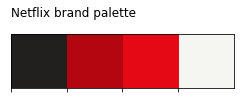

In [9]:
# Palette with colors of Netflix
plt.figure(figsize=(12, 8), dpi=600)
sns.palplot(['#221f1f', '#b20710', '#e50914', '#f5f5f1'])
plt.title("Netflix brand palette ", loc='left', y=1.2)

plt.show()


In [10]:
# Check date_added type
print('The date_added type is: {}'.format(df['date_added'].dtype), '\n')

# Convert to datetime type
df['date_added'] = pd.to_datetime(df['date_added'])

# Create columns with year, month and day separated
df['day_added'] = df['date_added'].dt.day.astype('Int64')
df['month_added'] = df['date_added'].dt.month.astype('Int64')
df['month_name_added'] = df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year.astype('Int64')


The date_added type is: datetime64[ns] 



In [11]:
# Counting the quantity of movies and TV shows added per year
year_add_vals = df.year_added.value_counts().sort_index()


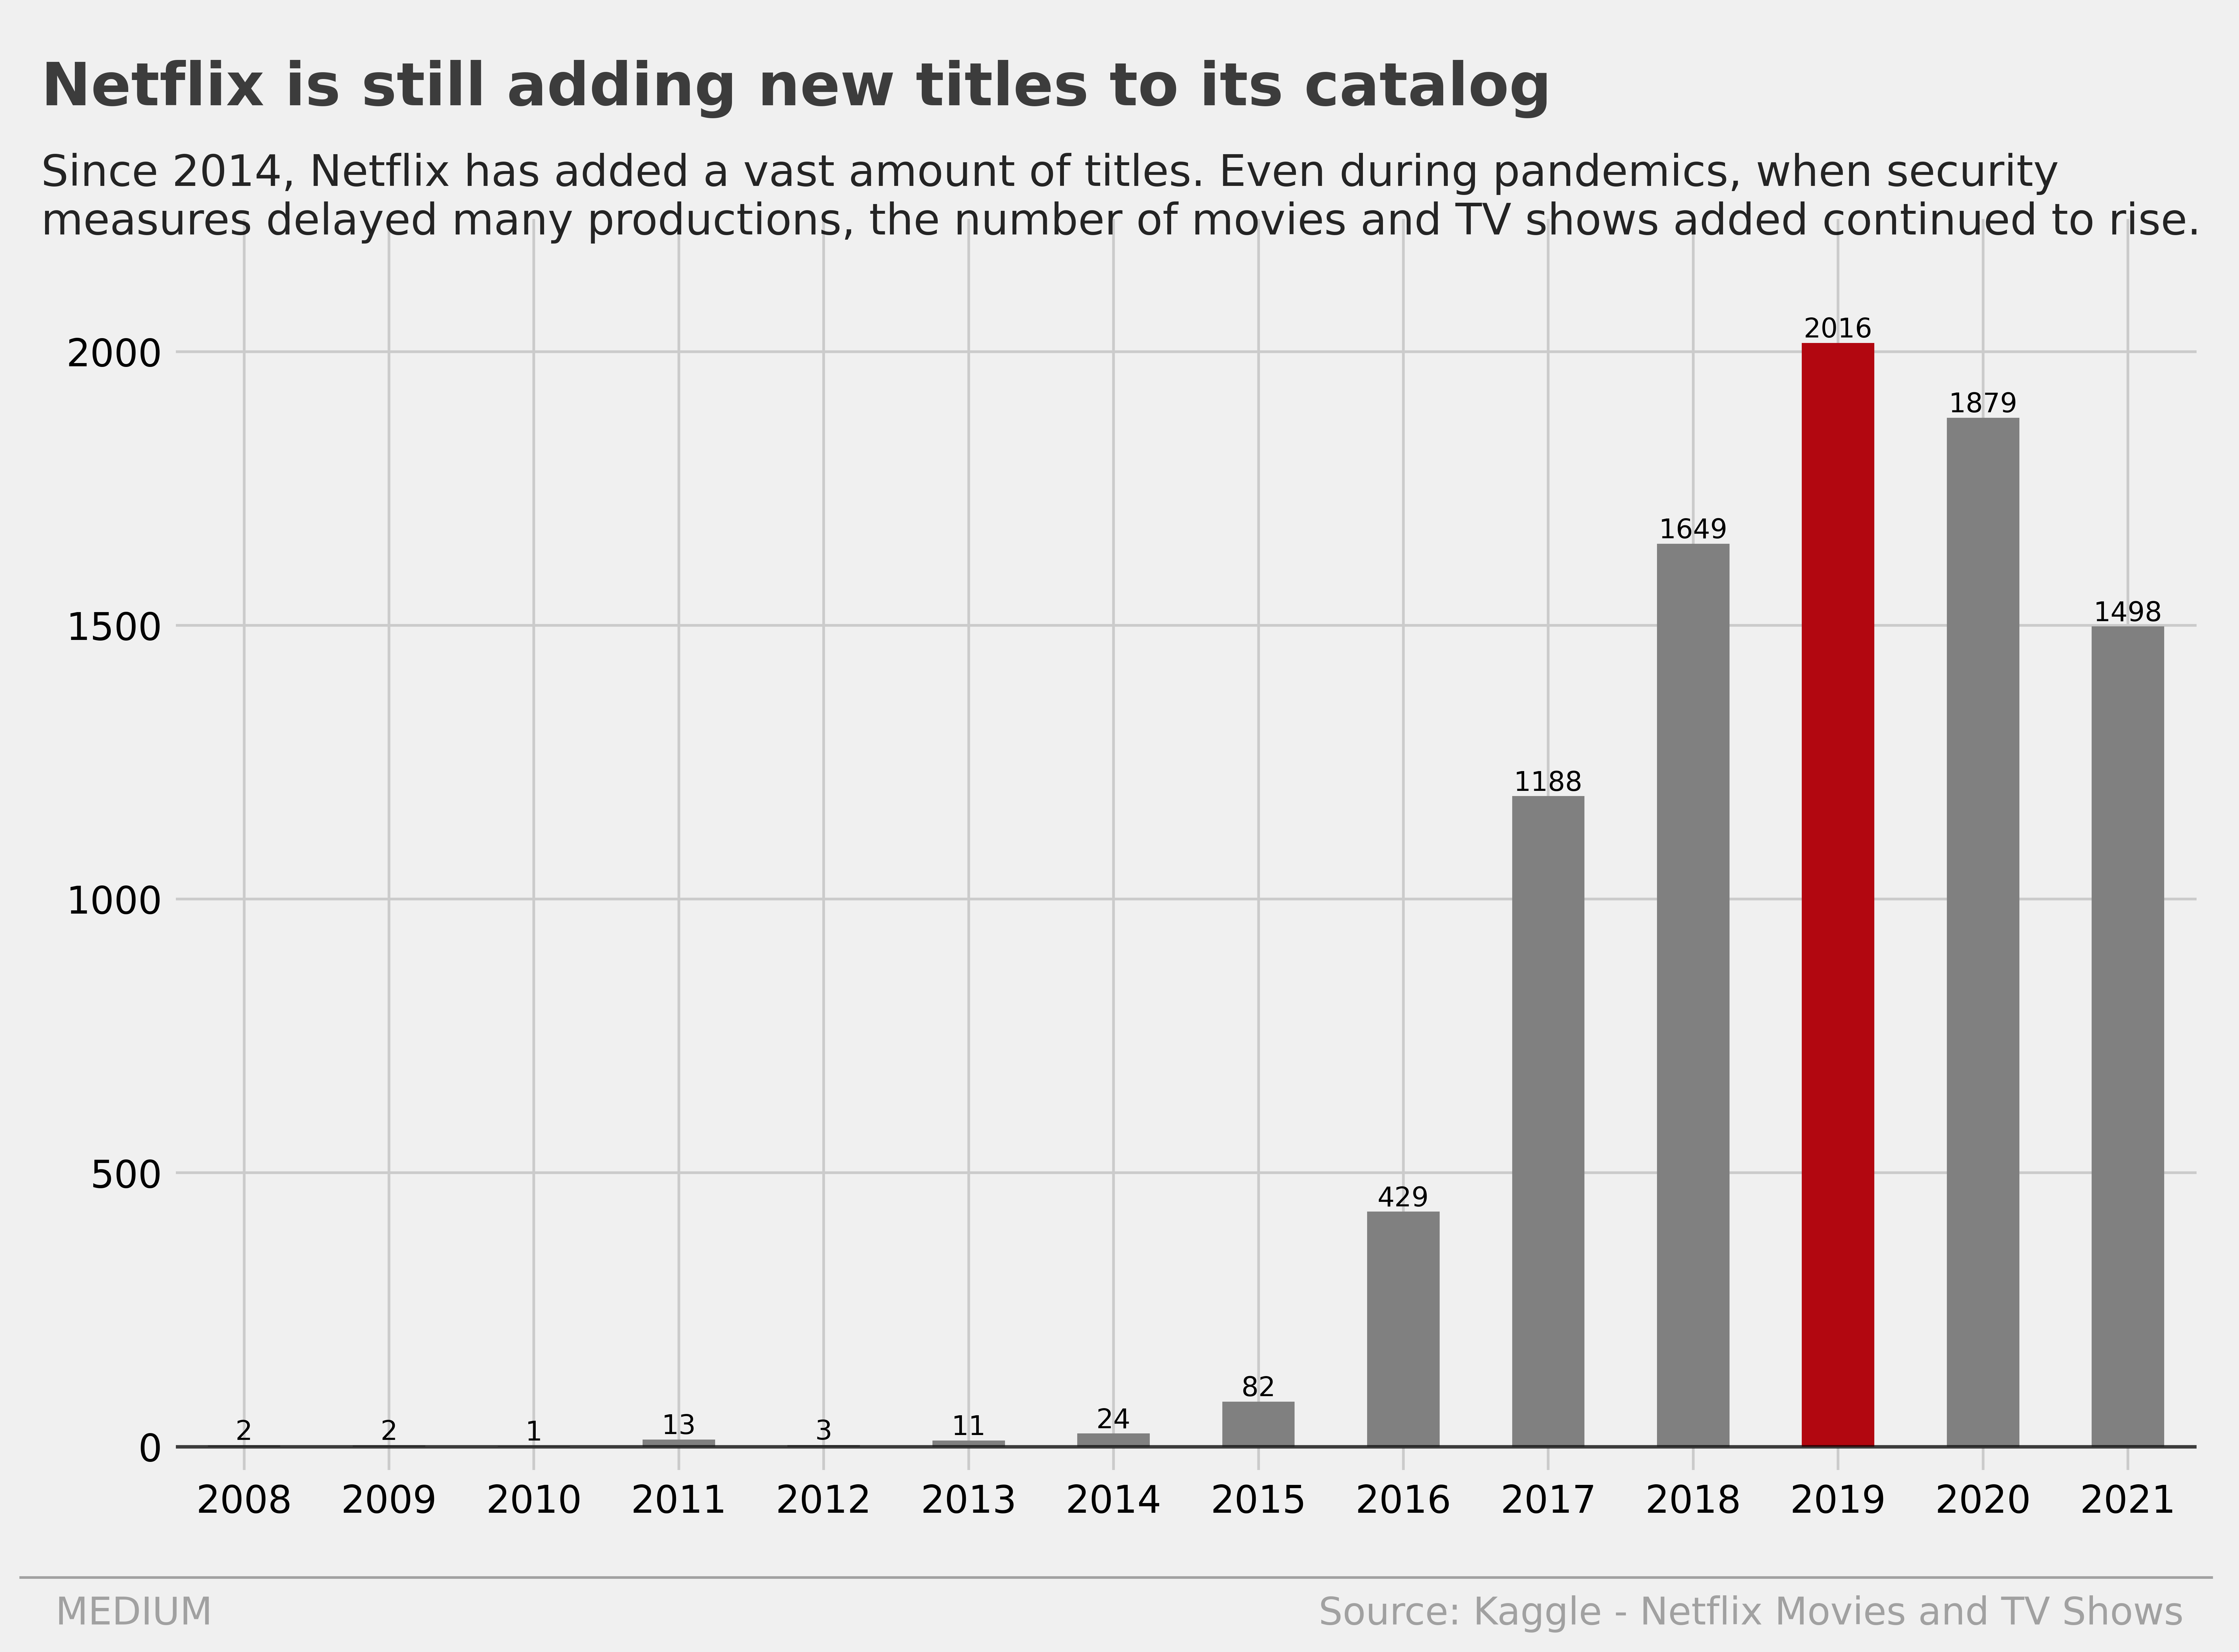

In [47]:
# Style
style.use('fivethirtyeight')

plt.rcParams["figure.dpi"] = 600
plt.rcParams['figure.figsize'] = 12, 8

# Color palette of the graph
clrs = ['grey' if (x < max(year_add_vals)) else '#b20710' for x in year_add_vals]

# Bar plot
fte_graph = year_add_vals.plot.bar(x=year_add_vals.index, y=year_add_vals,
                                   color=clrs, legend=False)

# Axis configurations
fte_graph.tick_params(axis='both', which='major', labelsize=14)
fte_graph.set_ylim(bottom=-50, top=2250)
fte_graph.axhline(y=0, color='black', linewidth=1.3, alpha=.7)
fte_graph.xaxis.label.set_visible(False)
plt.xticks(rotation=0)

# Adding a title and a subtitle
fte_graph.text(x=-1.4, y=2475, s="\n",
               fontsize=14, weight='bold', alpha=.75)
fte_graph.text(x=-1.4, y=2450, s="Netflix is still adding new titles to its catalog", 
               fontsize=22, weight='bold', alpha=.75)
fte_graph.text(x=-1.4, y=2125,
               s="Since 2014, Netflix has added a vast amount of titles. Even " \
               "during pandemics, when security \nmeasures delayed many productions, " \
               "the number of movies and TV shows added continued to rise.\n",
               fontsize=16, alpha=.85)

# Adding a signature
fte_graph.text(x=-1.55, y=-225,
               s="__________________________________________________________" \
               "__________________________________________________________", 
               color='grey', alpha=.7)
fte_graph.text(x=-1.55, y=-325,
               s="   MEDIUM                                                 " \
               "                                           Source: Kaggle - " \
               "Netflix Movies and TV Shows   " , fontsize=14, 
               color='grey', alpha=.7)

# Bars annotation
for container in fte_graph.containers:
    fte_graph.bar_label(container, fontsize=10)

# Save graph as PNG
plt.savefig('Figure1.png', format='png', dpi=600, bbox_inches='tight')

plt.show()


In [13]:
# 2021 is likely to reach 2020 quantity of added movies and TV shows?

# What is the most recent date of a movie or TV show published in the dataset?
date_limit = df.date_added.sort_values(ascending=False)[0]
print("the most recent date of a added title in 2021 \
      was added in {}".format(date_limit.date()))

# Difference between dates
one_year = np.timedelta64(365, 'D')

# What is the quantity added in 2020 until this date
published_before = np.sum((df.date_added < date_limit - one_year) &
                          (df.date_added > '1-1-2020'))
published_after = np.sum((df.date_added > date_limit - one_year) &
                         (df.date_added < '1-1-2021'))

print("\n{} titles were added in 2020 before the most recent date \
       of a added title in 2021".format(published_before))
print("\n{} titles were added in 2020 after the most recent date \
       of a added title in 2021".format(published_after))
print("\nIf the same quantity be published in 2021, the 2021 quantity will \
       surpass the 2020 quantity. The total estimation is \
       {} titles".format(year_add_vals[2021]+published_after))


the most recent date of a added title in 2021       was added in 2021-09-25

1247 titles were added in 2020 before the most recent date        of a added title in 2021

516 titles were added in 2020 after the most recent date        of a added title in 2021

If the same quantity be published in 2021, the 2021 quantity will        surpass the 2020 quantity. The total estimation is        2014 titles


What conclusions may be drawn from this?

* From 2013 to 2019, the number of movies and TV shows added increased.
* The number of titles added in 2020 was lower than in 2019. It's important to remember that many Netflix releases were likely delayed or canceled because of COVID-19 pandemics.
* The number of titles added in 2021 was lower than in 2020 and 2019. Perhaps Netflix's goal of introducing a large number of movies has been modified to include just movies and TV shows of higher quality? Almost certainly not! The year 2021 isn't over yet. A simple strategy for testing our hypothesis is to compare the number of titles added in 2021 to the most current dataset date with the number added in 2020 for the same period. Before the most recent date of a title addition in 2021, 1247 titles were added by Netflix in 2020. After the most recent date of an additional title in 2021, 516 titles were added in 2020. If Netflix adds the same amount until the end of 2021, this year's amount will exceed the amount added in 2020. A total of 2014 titles, according to this logic, can be a straightforward but acceptable projection for 2021.

Given that pandemics impacted the production of many titles, particularly until the middle of 2021, it's plausible to infer that Netflix is adding more content to its collection than ever before, based on our estimation. However, it is essential to mention that Netflix may or may not exceed our simple prediction and 2019 quantities. It was a simple idea for making a projection, which is valuable, but we know that there are better approaches to forecast time series.




## **Q.2:** Which countries' movies and TV series are being added to Netflix?

In [14]:
# Lets check the quantity of the titles per country
df = df.dropna(subset=['country'], axis=0, how='any')
df.country.value_counts()


United States                                   2818
India                                            972
United Kingdom                                   419
Japan                                            245
South Korea                                      199
                                                ... 
South Africa, Angola                               1
Belgium, United Kingdom                            1
United States, Israel, Italy, South Africa         1
United States, Senegal                             1
Germany, United States, Hong Kong, Singapore       1
Name: country, Length: 748, dtype: int64

In [15]:
# We need to solve the problem of more than one country per title.
# I will consider only the first country as the one that produced the title.
df_clean = df['country'].str.replace('\,.*', '', regex=True)

df.country = df_clean


In [16]:
# Lets check the quantity of the titles per country again
titles_per_countries = df.country.value_counts()
print(titles_per_countries[0:17])


United States     3211
India             1008
United Kingdom     628
Canada             271
Japan              259
France             212
South Korea        211
Spain              181
Mexico             134
Australia          117
Egypt              112
Turkey             111
Germany            103
China              100
Nigeria             96
Taiwan              85
Indonesia           85
Name: country, dtype: int64


In [17]:
titles_sorted = titles_per_countries[0:15]


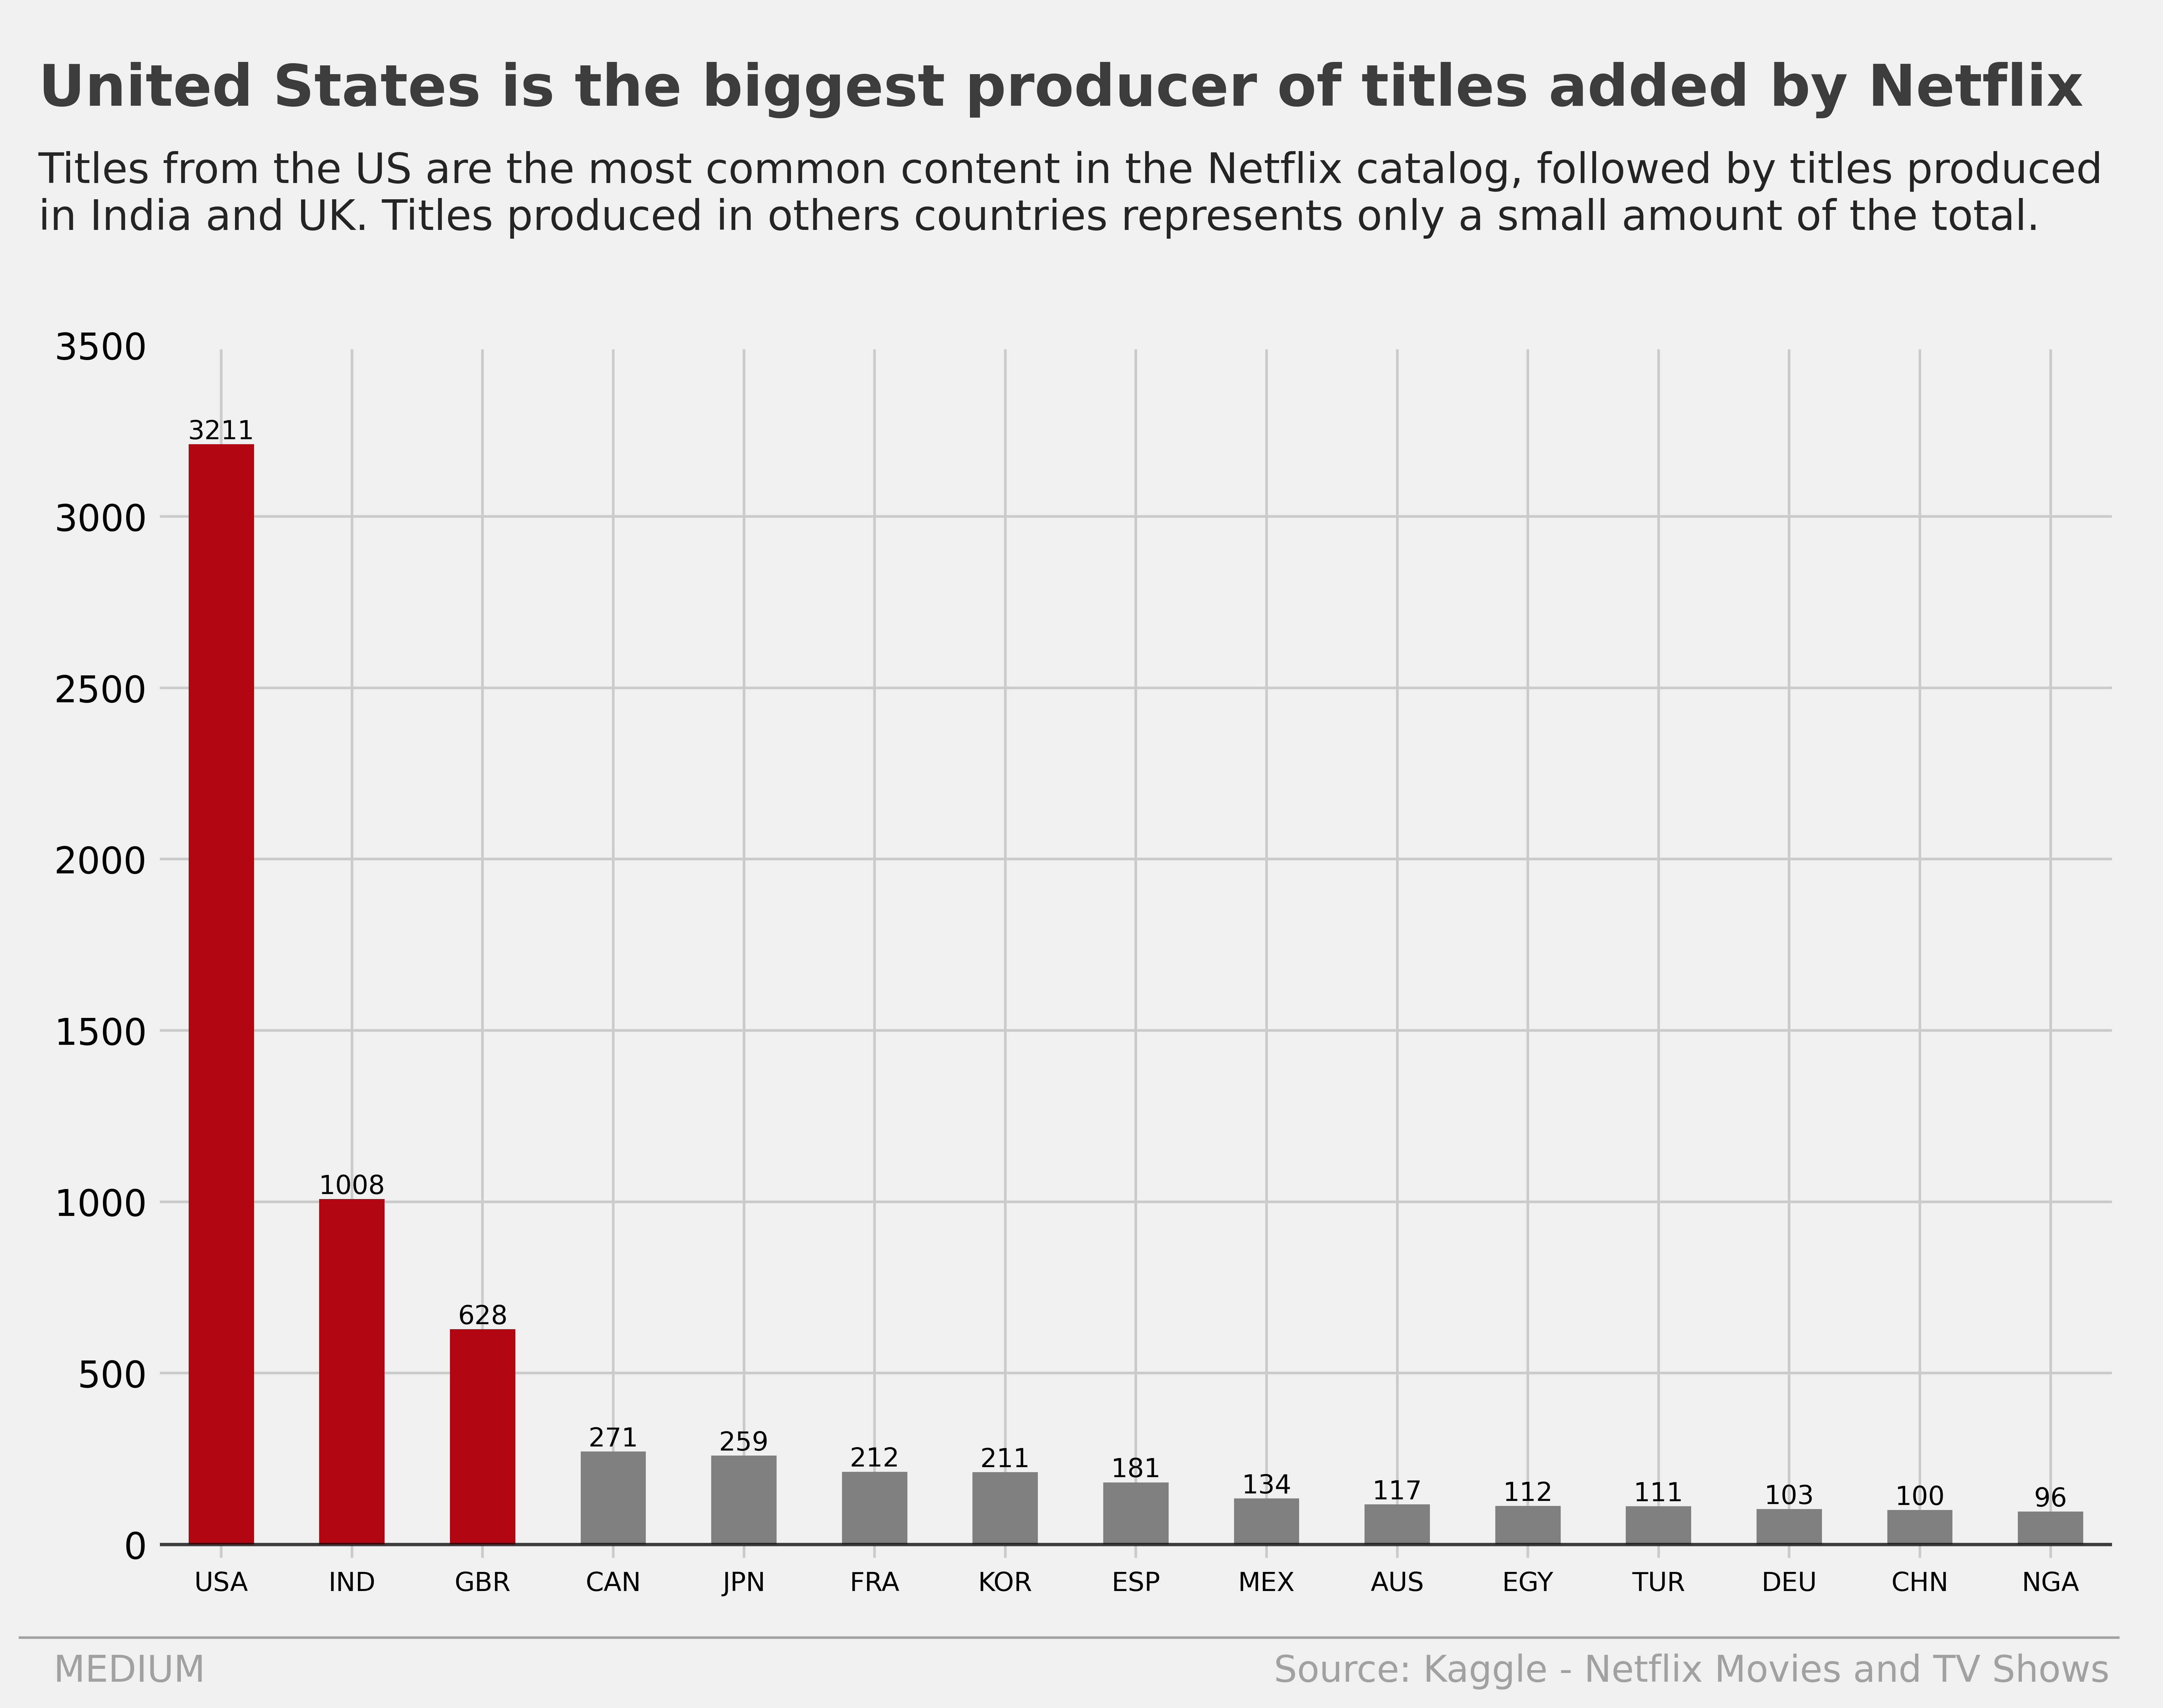

In [48]:
# Style
style.use('fivethirtyeight')

plt.rcParams["figure.dpi"] = 600
plt.rcParams['figure.figsize'] = 12, 8

# Color palette of the graph
clrs = ['grey' if (x < titles_per_countries.sort_values(ascending=False)[2])
        else '#b20710' for x in titles_per_countries]

# Countries names to ISO Code
countries_iso_3 = ['USA', 'IND', 'GBR', 'CAN', 'JPN', 'FRA', 'KOR', 'ESP',
                   'MEX', 'AUS', 'EGY', 'TUR', 'DEU', 'CHN', 'NGA']
df_plot = pd.DataFrame({'titles_sorted': titles_sorted.to_list()},
                       index=countries_iso_3)

# Bar plot
fte_graph = df_plot.plot.bar(y='titles_sorted', color=clrs, legend=False)

# Axis configuration
fte_graph.tick_params(axis='both', which='major', labelsize=14)
fte_graph.set_ylim(bottom=-50, top=3500)
fte_graph.axhline(y=0, color='black', linewidth=1.3, alpha=.7)
fte_graph.xaxis.label.set_visible(False)
plt.xticks(rotation=0, size=10)

# Adding a title and a subtitle
fte_graph.text(x=-1.4, y=4250, s="\n",
               fontsize=14, weight='bold', alpha=.75)
fte_graph.text(x=-1.4, y=4200, s="United States is the biggest producer of " \
               "titles added by Netflix", fontsize=22, weight='bold', alpha=.75)
fte_graph.text(x=-1.4, y=3700,
               s="Titles from the US are the most common content in the " \
               "Netflix catalog, followed by titles produced \nin India and " \
               "UK. Titles produced in others countries represents only a small " \
               "amount of the total.\n", fontsize=16, alpha=.85)

# Adding a signature
fte_graph.text(x=-1.55, y=-250,
               s="__________________________________________________________" \
               "_________________________________________________________",
               color='grey', alpha=.7)
fte_graph.text(x=-1.55, y=-400,
               s="   MEDIUM                                                 " \
               "                                           Source: Kaggle - " \
               "Netflix Movies and TV Shows   " , fontsize=14, 
               color='grey', alpha=.7)

# Bar Annotation
for container in fte_graph.containers:
    fte_graph.bar_label(container, fontsize=10)

# Save graph as PNG
plt.savefig('Figure2.png', format='png', dpi=600, bbox_inches='tight')

plt.show()


Netflix's primary content source is the United States, with India and the United Kingdom coming in second and third. It stands to reason that the United States produces the most significant amount of content. After all, Netflix is a company based in the United States. Given the overall number of titles analyzed (8807), these three nations account for more than half of the content available on Netflix.

## **Q.3:** Is there a difference in the number of movies and TV shows added to the catalog based on region?

In [19]:
# Map values per region with a list
class continents:
    Africa = ('Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina', 'Burundi', 'Cameroon', 'Cape Verde',
              'Central African Republic', 'Chad', 'Comoros', 'Congo',
              'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana',
              'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar',
              'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria',
              'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia',
              'South Africa', 'South Sudan', 'Sudan', 'Swaziland', 'Tanzania', 'Togo', 'Tunisia', 'Uganda',
              'Zambia', 'Zimbabwe')

    Asia = ('Afghanistan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei',
            'Burma (Myanmar)', 'Cambodia', 'China', 'East Timor', 'India', 'Hong Kong',
            'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan',
            'North Korea', 'South Korea', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon',
            'Malaysia', 'Maldives', 'Mongolia', 'Nepal', 'Oman', 'Pakistan', 'Philippines',
            'Qatar', 'Russia', 'Saudi Arabia', 'Singapore', 'Sri Lanka',
            'Syria', 'Tajikistan', 'Thailand', 'Turkey', 'Turkmenistan', 'Taiwan', 'United Arab Emirates',
            'Uzbekistan', 'Vietnam', 'Yemen')

    Europe = ('Albania', 'Andorra', 'Armenia',
              'Austria', 'Azerbaijan', 'Belarus',
              'Belgium', 'Bosnia and Herzegovina',
              'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic',
              'Denmark', 'Estonia', 'Finland', 'France',
              'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland',
              'Ireland', 'Italy', 'Latvia', 'Liechtenstein',
              'Lithuania', 'Luxembourg', 'Macedonia', 'Malta',
              'Moldova', 'Monaco', 'Montenegro', 'Netherlands',
              'Norway', 'Poland', 'Portugal', 'Romania',
              'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain',
              'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom', 'Vatican City')

    North_America = ('Antigua and Barbuda', 'Bahamas', 'Barbados',
                     'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica',
                     'Dominican Republic', 'El Salvador', 'Grenada', 'Guatemala', 'Haiti',
                     'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Saint Kitts and Nevis',
                     'Saint Lucia', 'Saint Vincent and the Grenadines', 'Trinidad and Tobago', 'United States')

    South_America = ('Argentina', 'Bolivia', 'Brazil', 'Chile',
                     'Colombia', 'Ecuador', 'Guyana', 'Paraguay',
                     'Peru', 'Suriname', 'Uruguay', 'Venezuela')

    Australia_Oceania = ('Australia', 'Fiji', 'Kiribati', 'Marshall Islands',
                         'Micronesia', 'Nauru', 'New Zealand', 'Palau',
                         'Papua New Guinea', 'Samoa', 'Solomon Islands',
                         'Tonga', 'Tuvalu', 'Vanuatu')

# Build dict of country and respective region
country_to_continent_map = {}
for name in dir(continents):
    if name.startswith('_'): 
        continue

    country_set = getattr(continents, name)

    for country in country_set:
        country_to_continent_map[country] = name


# Define function that map continent by country inserted
def get_continent(country):
    try:
        return country_to_continent_map[country]
    except KeyError:
        return 'Other'

# Apply the function and save the region as a new column of the dataset
country = df['country']
df['region'] = country.apply(get_continent)
df.head(5)


show_id     type  ... year_added         region
0      s1    Movie  ...       2021  North_America
1      s2  TV Show  ...       2021         Africa
4      s5  TV Show  ...       2021           Asia
7      s8    Movie  ...       2021  North_America
8      s9  TV Show  ...       2021         Europe

[5 rows x 19 columns]

In [20]:
# Lets check what are the titles mapped with Region equal Other
print(df[df['region'] == 'Other'])

# Lets drop these rows
df.drop(index=df[df['region'] == 'Other'].index, axis=0, inplace=True)


     show_id     type  ... year_added region
193     s194  TV Show  ...       2021  Other
365     s366    Movie  ...       2021  Other
2660   s2661  TV Show  ...       2020  Other
5079   s5080    Movie  ...       2018  Other
5612   s5613    Movie  ...       2017  Other

[5 rows x 19 columns]


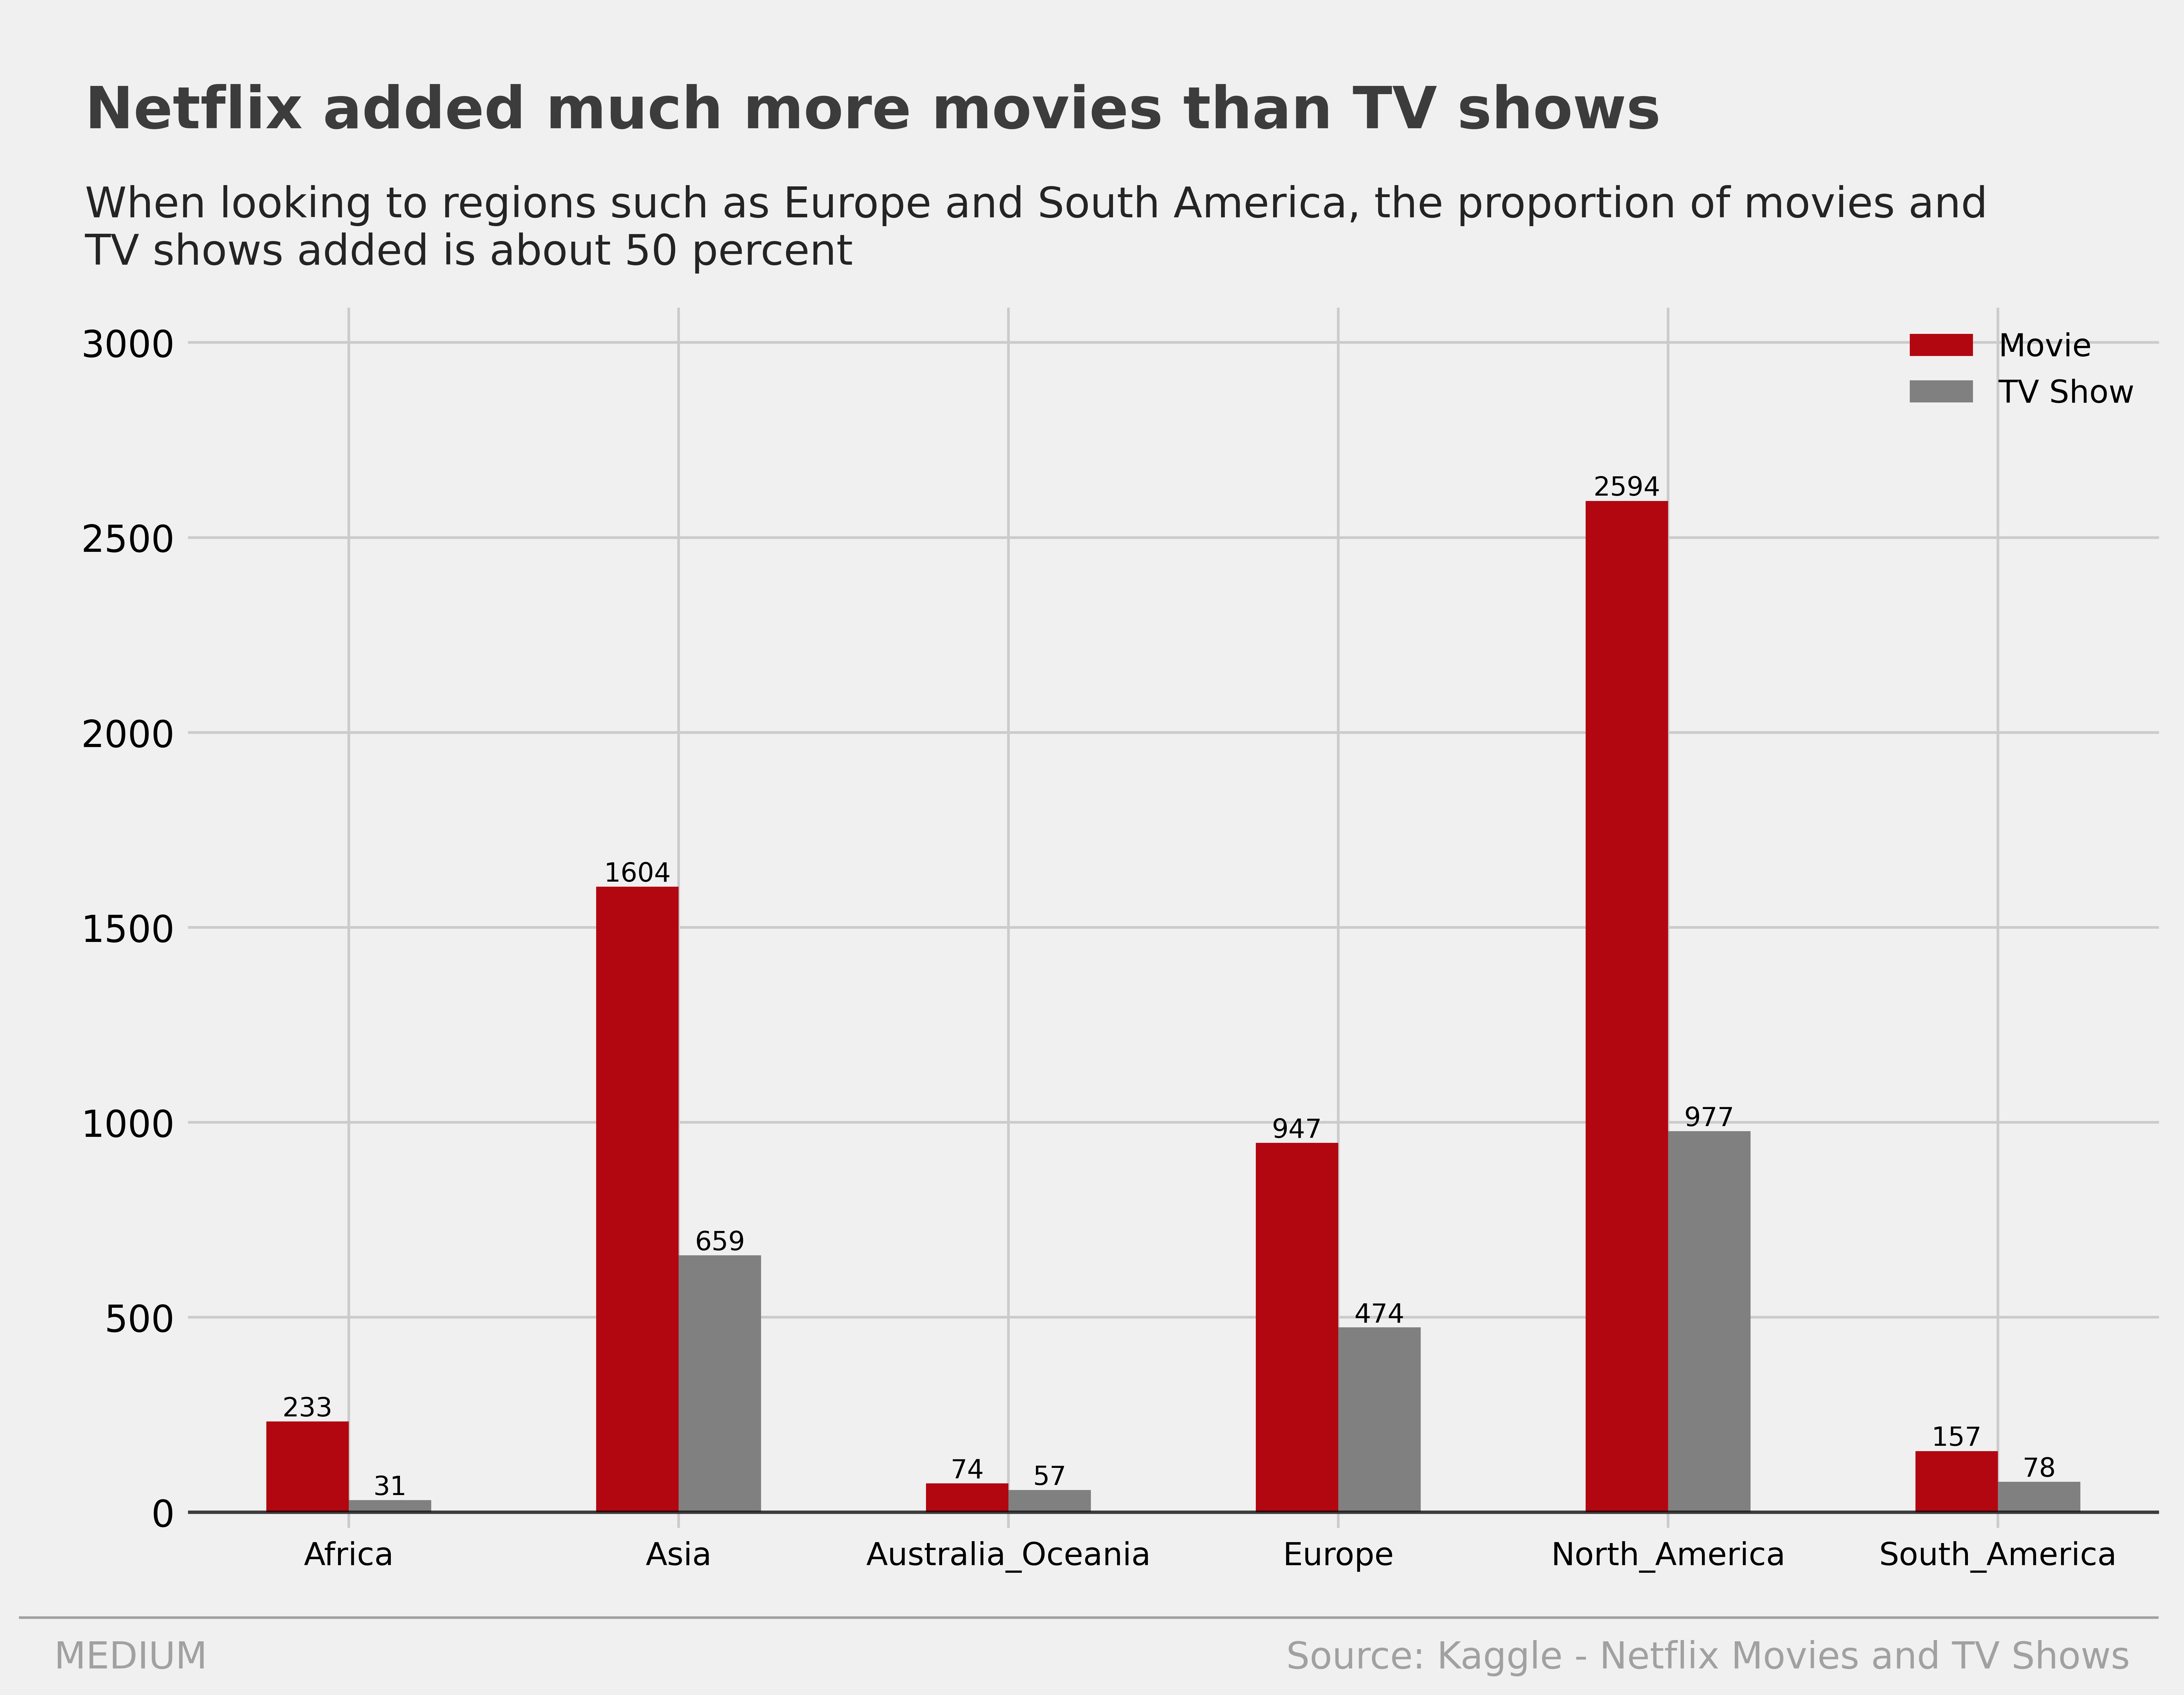

In [29]:
# Style
style.use('fivethirtyeight')

plt.rcParams["figure.dpi"] = 600
plt.rcParams['figure.figsize'] = 12, 8

# Preparing the data
titles_per_regions = df[['region', 'type']].value_counts(sort=False)
df_plot = pd.DataFrame({'titles_regions': titles_per_regions.to_list(),
                        'type': titles_per_regions.index.get_level_values('type').to_list(),
                        'region': titles_per_regions.index.get_level_values('region').to_list()}
                       )
df_plot = df_plot.pivot(index='region', columns='type', values='titles_regions')

# Bar plot
fte_graph = df_plot.plot.bar(legend=True, color=['#b20710', 'grey'])

# Axis Configuration
fte_graph.tick_params(axis='both', which='major', labelsize=14)
fte_graph.set_ylim(bottom=-50, top=3100)
fte_graph.axhline(y=0, color='black', linewidth=1.3, alpha=.7)
fte_graph.xaxis.label.set_visible(False)
plt.xticks(rotation=0, size=12)

# Legend Configuration
fte_graph.legend(loc='best', ncol=1, prop={'size': 12}, frameon=False)

# Adding a title and a subtitle
fte_graph.text(x=-0.8, y=3650, s="\n", fontsize=14, weight='bold', alpha=.75)
fte_graph.text(x=-0.8, y=3550, s="Netflix added much more movies than TV shows",
               fontsize=22, weight='bold', alpha=.75) 
fte_graph.text(x=-0.8, y=3200, s="When looking to regions such as Europe and South America, " \
                  "the proportion of movies and \nTV shows added is about " \
                  "50 percent", fontsize=16, alpha=.85)

# Adding a signature
fte_graph.text(x=-1.0, y=-250,
               s="__________________________________________________________" \
               "__________________________________________________________", color='grey', 
               alpha=.7)
fte_graph.text(x=-1.0, y=-400,
               s="   MEDIUM                                                 " \
               "                                           Source: Kaggle - " \
               "Netflix Movies and TV Shows   ",
               fontsize=14, color='grey', alpha=.7)

# Bar Annotation
for container in fte_graph.containers:
    fte_graph.bar_label(container, fontsize=10)

# Save graph as PNG
plt.savefig('Figure3.png', format='png', dpi=600, bbox_inches='tight')

plt.show()


In regions such as Europe and South America, the proportion of movies and TV shows added is around 50%. When other regions were examined, such as North America, Asia, and Africa, the balance of TV shows added was lower, with around 38%, 41%, and 13%, respectively. Australia and Oceania have a higher ratio, about 77 percent. This disparity in ratios could be explained by the fact that some regions prefer to watch television shows instead of movies. Who knows, maybe it's because some regions produce more TV shows than movies. However, it is natural for the region in which Hollywood is located to make more movies than television shows.

## **Q.4:** What were the strategies for adding content to regions?

In [22]:
df2 = df.groupby(['year_added', 'region'], as_index=False).count()

# We want to see the quantity added per year for the regions
df2 = df2[['year_added', 'region', 'title']]

df2 = df2.pivot(index='year_added', columns='region', values='title')

df2 = df2.fillna(0)

df2.head()


region      Africa  Asia  ...  North_America  South_America
year_added                ...                              
2008           0.0   0.0  ...            2.0            0.0
2009           0.0   0.0  ...            1.0            0.0
2010           0.0   0.0  ...            1.0            0.0
2011           0.0   0.0  ...           12.0            0.0
2012           0.0   0.0  ...            3.0            0.0

[5 rows x 6 columns]

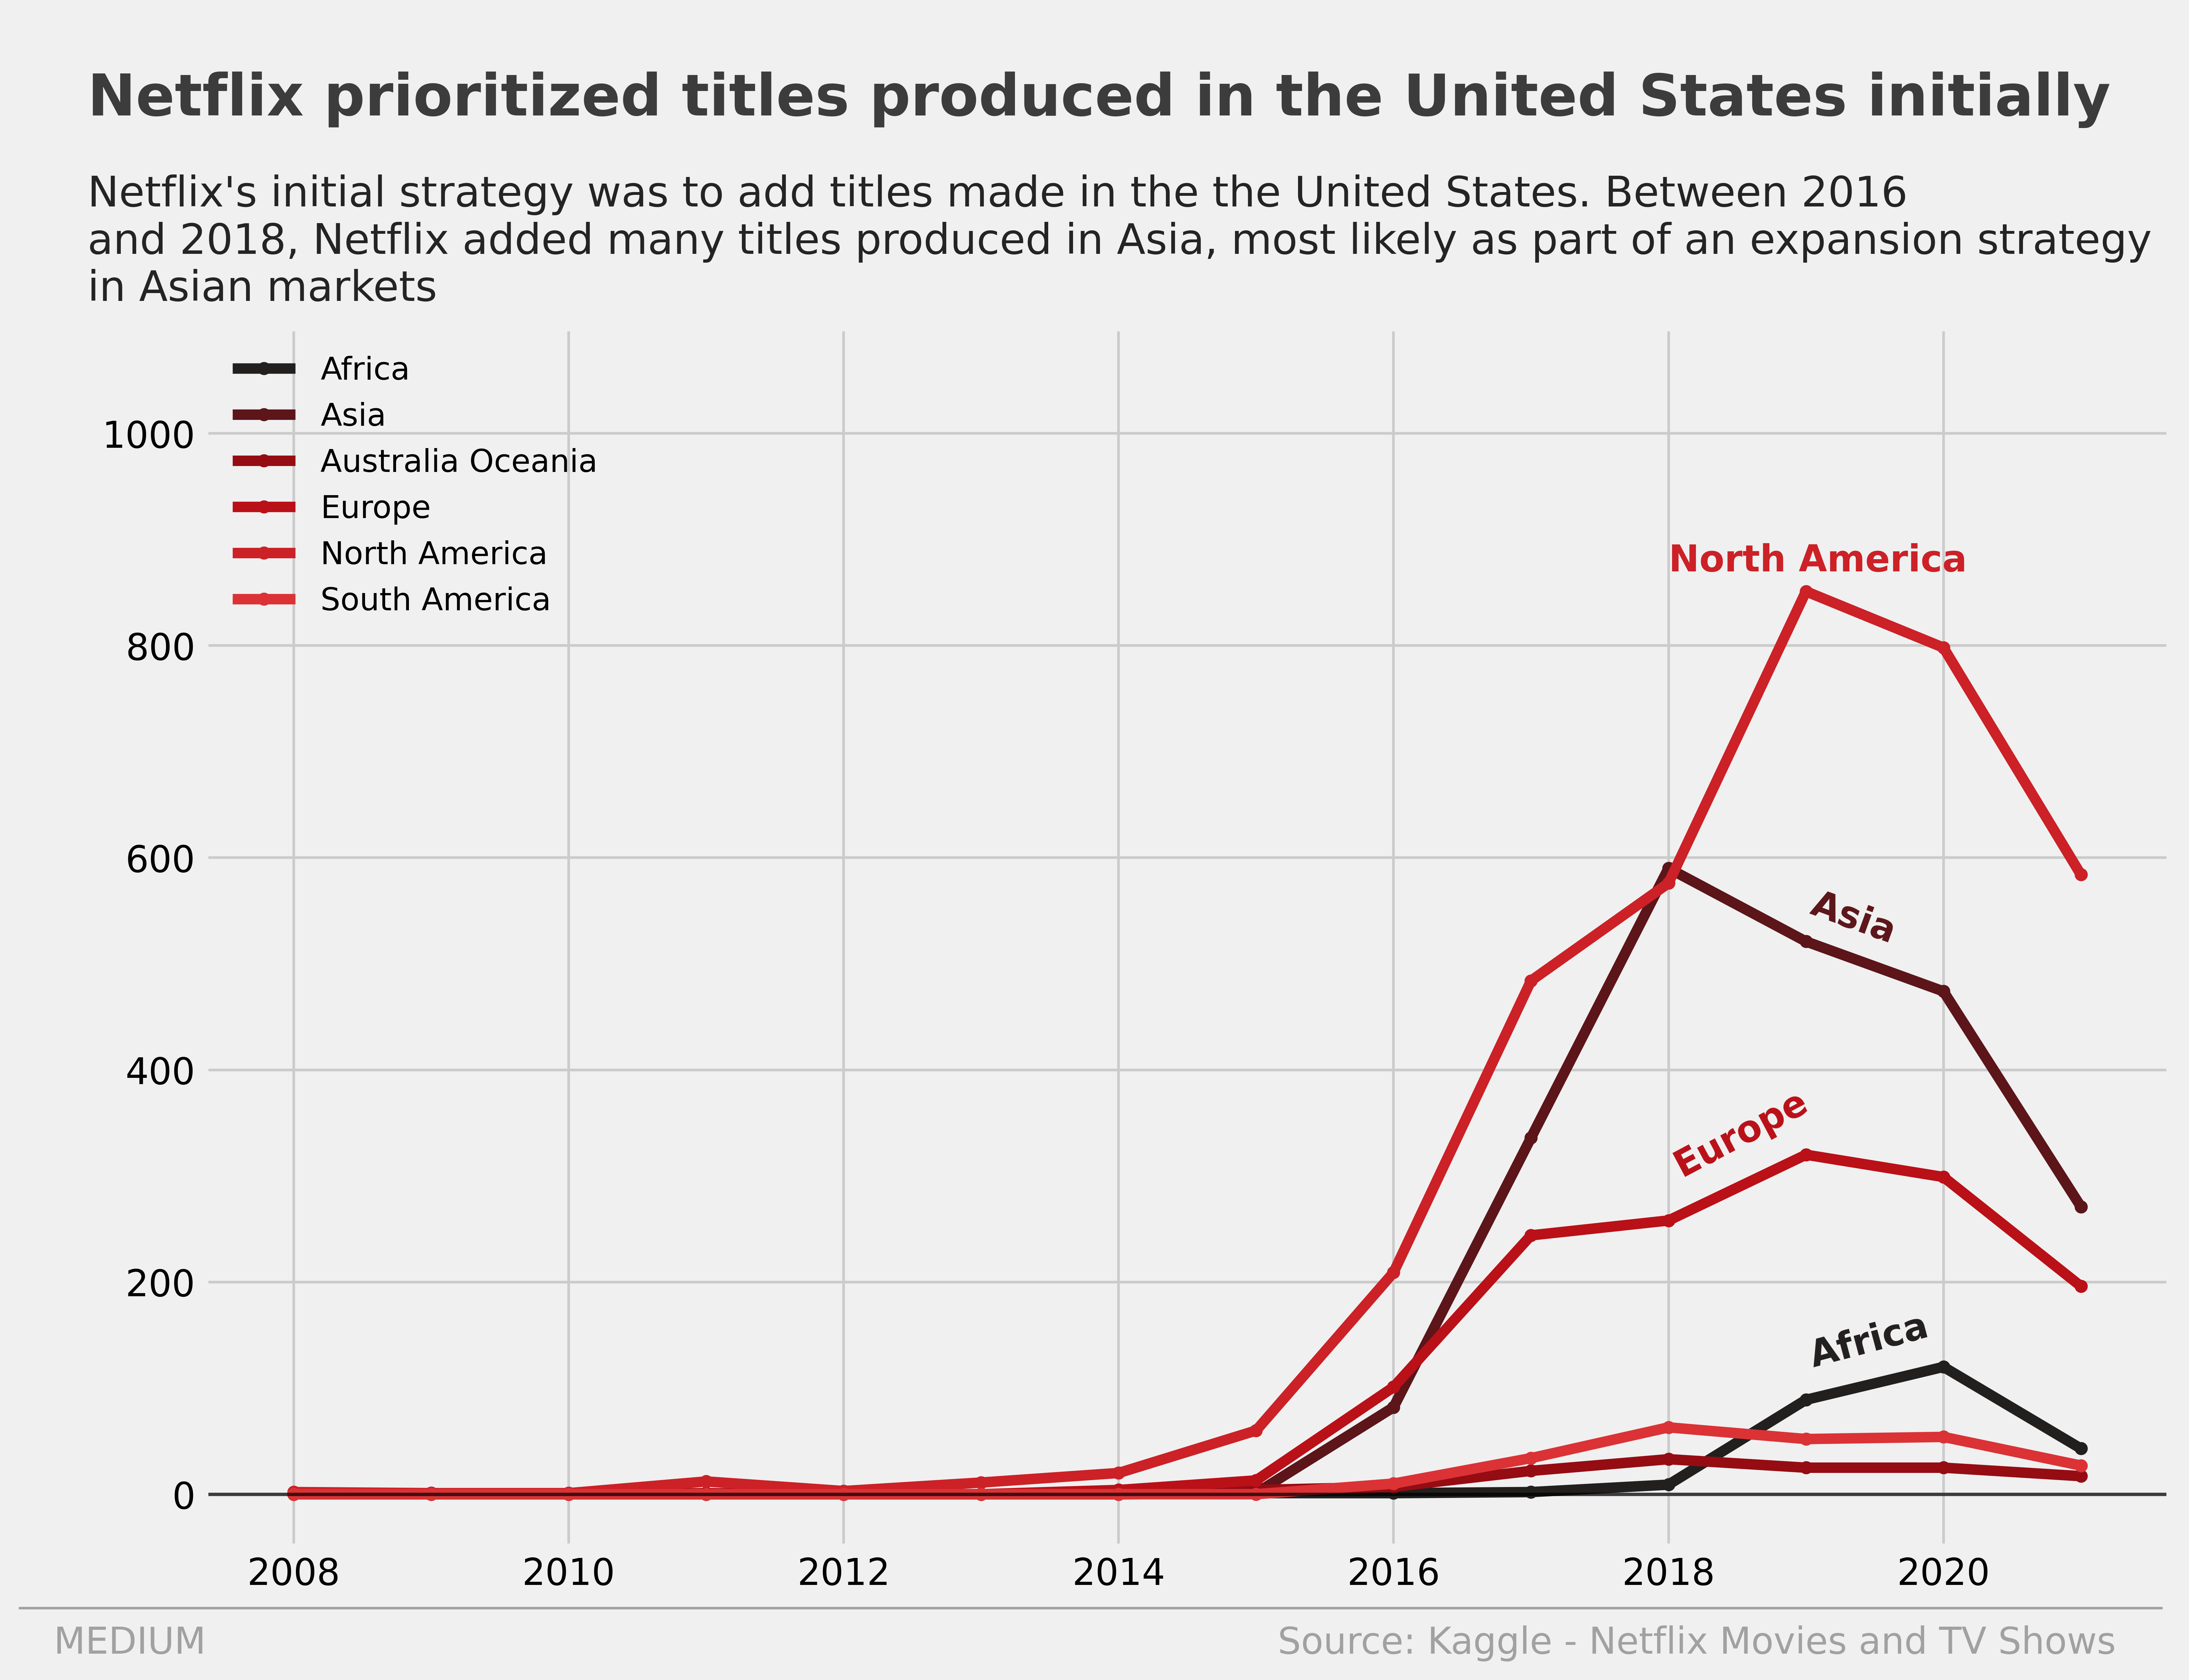

In [50]:
# Style
style.use('fivethirtyeight')

plt.rcParams["figure.dpi"] = 600
plt.rcParams['figure.figsize'] = 12, 8

# Custom colour map based on Netflix palette
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f',
                                                                '#b20710',
                                                                '#db3236'])

# Multiple lines graph
fte_graph = df2.plot(y=df2.columns, colormap=cmap, legend=True,
                     marker='o', markersize=4)

# Axis Configuration
fte_graph.tick_params(axis='both', which='major', labelsize=14)
fte_graph.set_ylim(bottom=-50, top=1100)
fte_graph.axhline(y=0, color='black', linewidth=1.3, alpha=.7)
fte_graph.xaxis.label.set_visible(False)
plt.xticks(rotation=0, size=14)

fte_graph.legend(labels=['Africa', 'Asia', 'Australia Oceania', 'Europe',
                         'North America', 'South America'],
                 loc='upper left', ncol=1, prop={'size': 12},
                 frameon=False)

# Adding a title and a subtitle
fte_graph.text(x=2006.5, y=1325, s="\n",
               fontsize=14, weight='bold', alpha=.75)
fte_graph.text(x=2006.5, y=1300, s="Netflix prioritized titles produced in " \
                                   "the United States initially",fontsize=22, weight='bold', alpha=.75)
fte_graph.text(x=2006.5, y=1125,
               s="Netflix's initial strategy was to add titles made in the " \
                 "the United States. Between 2016 \nand 2018, Netflix added many titles " \
                 "produced in Asia, most likely as part of an expansion " \
                 "strategy \nin Asian markets", fontsize=16, alpha=.85)

# Adding a signature
fte_graph.text(x=2006, y=-100,
               s="__________________________________________________________" \
               "___________________________________________________________",
               color='grey', alpha=.7)
fte_graph.text(x=2006, y=-150,
               s="   MEDIUM                                                 " \
               "                                           Source: Kaggle - " \
               "Netflix Movies and TV Shows   " , fontsize=14, 
               color='grey', alpha=.7)

# Legend
fte_graph.text(x=2018, y=870, s='North America', color=cmap(0.8),
               weight='semibold', rotation=0, backgroundcolor='#f0f0f0',
               bbox=dict(facecolor='none', edgecolor='none'))
fte_graph.text(x=2019, y=520, s='Asia', color=cmap(0.2), weight='semibold',
               rotation=-20, backgroundcolor='#f0f0f0',
               bbox=dict(facecolor='none', edgecolor='none'))
fte_graph.text(x=2018, y=300, s='Europe', color=cmap(0.6), weight='semibold',
               rotation=28, backgroundcolor='#f0f0f0',
               bbox=dict(facecolor='none', edgecolor='none'))
fte_graph.text(x=2019, y=120, s='Africa', color=cmap(1), weight='semibold',
               rotation=15, backgroundcolor='#f0f0f0',
               bbox=dict(facecolor='none', edgecolor='none'))

# Save graph as SVG
plt.savefig('Figure4.png', format='png', dpi=600, bbox_inches='tight')

plt.show()


Netflix's initial strategy was to add titles produced in the United States. Between 2016 and 2018, Netflix added many titles produced in Asia, most likely as part of an Asian market expansion strategy. Netflix increased the number of titles produced in Europe, and Africa added for both 2019 and 2020.




 ## **Q.5:** Based on title rating, who is the target audience for the titles added from the major countries?

In [24]:
# Lets check all the values for ratings
print(df.rating.unique())

# We need to drop the rows with the values 74 min, 84 min, 66 min and NR, these were rows with errors
df = df.drop(df[df.rating.isin(['74 min', '84 min', '66 min', 'NR'])].index)
df.dropna(subset=['rating'], inplace=True)

# Selecting only the TOP 15 countries in the dataset
data = df.groupby('country')[['country', 'count']].sum().sort_values(by='count', 
                                                                    ascending=False).reset_index()[:15]
data = data.country
df_heatmap = df.loc[df.country.isin(data)]

# Checking the countries in the Data Frame
df_heatmap.country.unique()


['PG-13' 'TV-MA' 'TV-14' 'TV-Y7' 'PG' 'R' 'TV-PG' 'TV-Y' 'TV-G' 'G'
 'NC-17' '74 min' '84 min' '66 min' 'NR' 'TV-Y7-FV' nan 'UR']


array(['United States', 'India', 'United Kingdom', 'Germany', 'Mexico',
       'Turkey', 'Australia', 'China', 'Nigeria', 'Japan', 'Spain',
       'France', 'South Korea', 'Canada', 'Egypt'], dtype=object)

In [25]:
# Changing the Countries names to equivalent ISO-3 Codes
iso_keys = ['USA', 'IND', 'GBR', 'CAN', 'JPN', 'FRA', 'KOR', 'ESP', 'MEX',
            'AUS', 'EGY', 'TUR', 'DEU', 'CHN', 'NGA']

keys = ['United States', 'India', 'United Kingdom', 'Germany', 'Mexico',
        'Turkey', 'Australia', 'China', 'Nigeria', 'Japan', 'Spain', 'France',
        'South Korea', 'Canada', 'Egypt']

di = dict(zip(keys, iso_keys))
df_heatmap.country = df_heatmap.country.map(di)

# Changing the Data Frame
df_heatmap = pd.crosstab(df_heatmap['country'], df_heatmap['target_ages'], 
                         normalize="index").T 


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


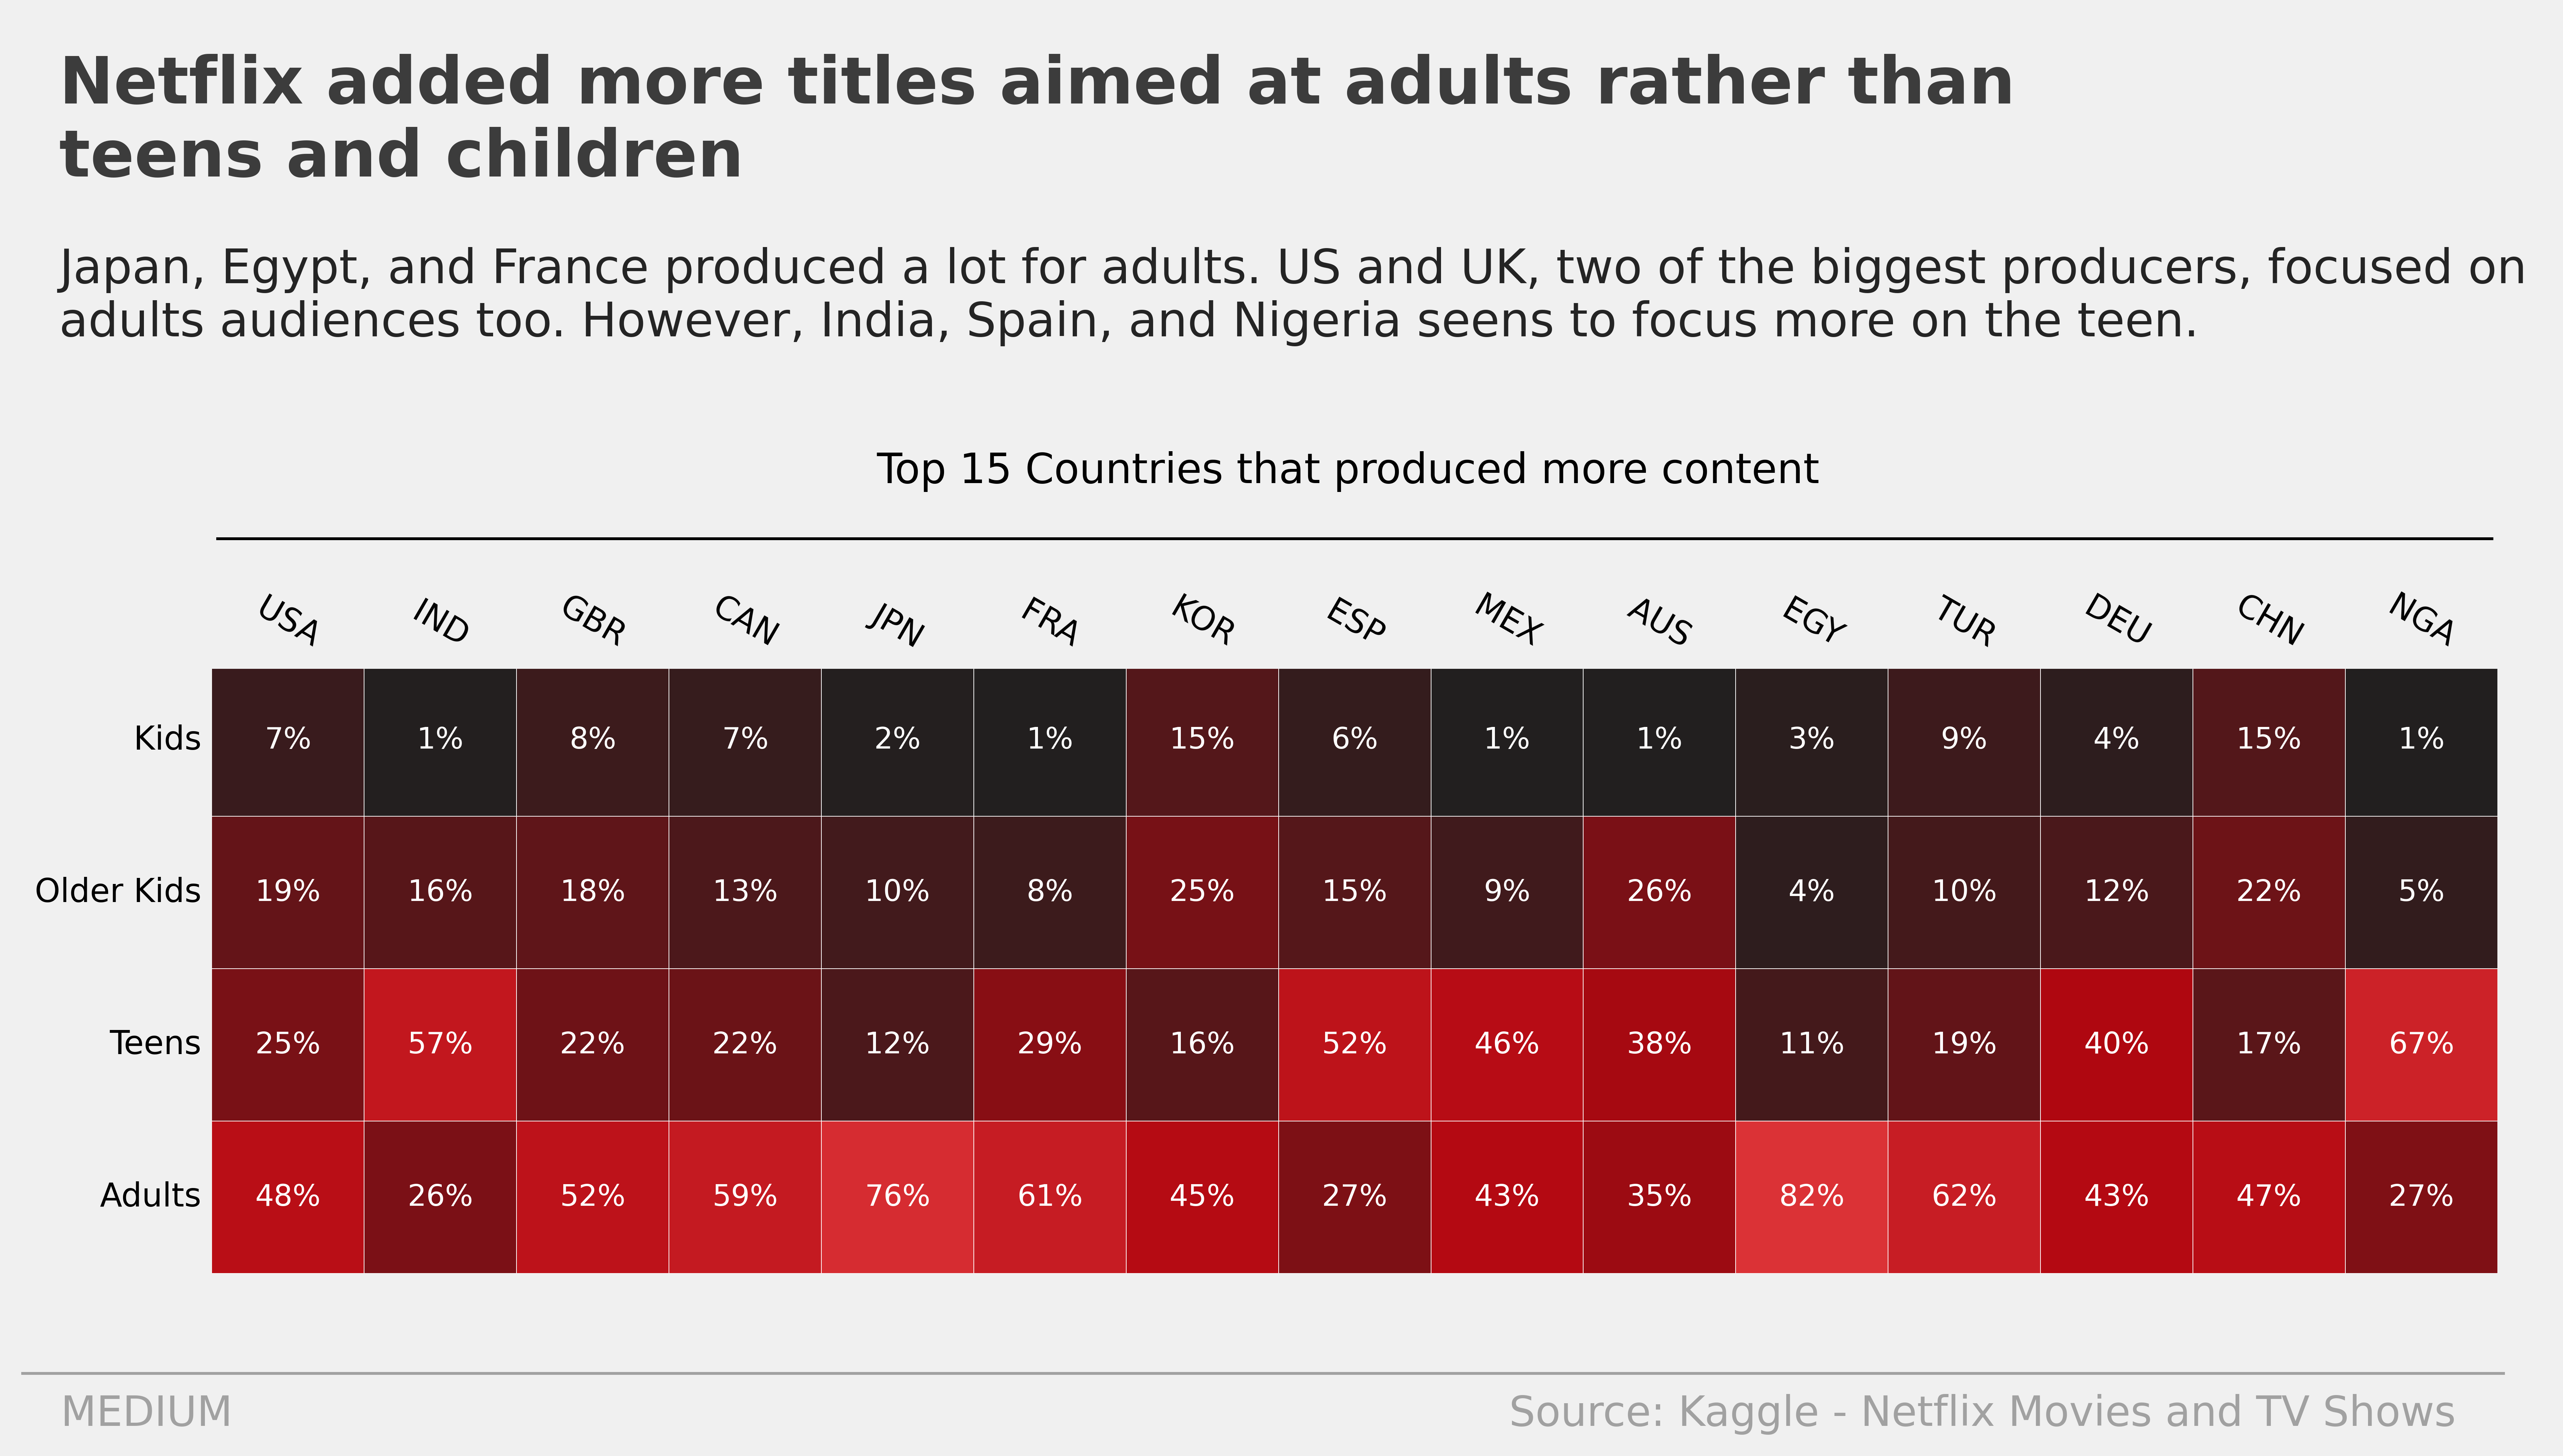

In [49]:
# Style
style.use('fivethirtyeight')

plt.rcParams["figure.dpi"] = 600
plt.rcParams['figure.figsize'] = 12, 8

# Custom colour map based on Netflix palette
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710', '#db3236'])

# Plot heatmap
country_order2 = ['USA', 'IND', 'GBR', 'CAN', 'JPN', 'FRA', 'KOR', 'ESP',
                  'MEX', 'AUS', 'EGY', 'TUR', 'DEU', 'CHN', 'NGA']

age_order = ['Kids', 'Older Kids', 'Teens', 'Adults']

fig, ax = plt.subplots(1, 1, figsize=(12, 12))
sns.heatmap(df_heatmap.loc[age_order, country_order2], cmap=cmap, square=True,
            linewidth=0.2, cbar=False, annot=True, fmt='1.0%', ax=ax,
            annot_kws={"fontsize": 10, "weight": "light"})

# Axis Configuration
ax.spines['top'].set_visible(True)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), rotation=-30, fontsize=11)
ax.set_ylabel('')
ax.set_xlabel("Top 15 Countries that produced more content \n _______________" \
"_____________________________________________________________________________" \
"__________________ \n", size=14)
ax.xaxis.set_label_position('top')
ax.tick_params(axis='both', which='both', length=0, top=True, labeltop=True,
               bottom=False, labelbottom=False)
plt.tight_layout()

# Adding a title and a subtitle
ax.text(x=-1, y=-3.7, s="\n", fontsize=14, weight='bold', alpha=.75)
ax.text(x=-1, y=-3.2, s="Netflix added more titles aimed at adults rather " \
        "than \nteens and children", fontsize=22, weight='bold', alpha=.75)
ax.text(x=-1, y=-1.8, s="Japan, Egypt, and France produced a lot for " \
                        "adults. US and UK, two of the biggest producers, " \
                        "focused on \nadults audiences too. However, " \
                        "India, Spain, and Nigeria seens to focus more " \
                        "on the teen. \n", fontsize=16, alpha=.85)

# Adding a signature
ax.text(x=-1.25, y=4.6, 
        s="__________________________________________________________" \
        "______________________________________________________________",
        color='grey', alpha=.7)
ax.text(x=-1.25, y=5, 
        s="   MEDIUM                                                      " \
        "                                           Source: Kaggle - " \
        "Netflix Movies and TV Shows   " , fontsize=14, 
        color='grey', alpha=.7)

# Save graph as PNG
plt.savefig('Figure5.png', format='png', dpi=600, bbox_inches='tight')

plt.show()


Japan, Egypt, and France are countries that the content added seems to target the adult audience. The same is true for the United States and the United Kingdom, two of the biggest producers focused on adults.

On the other hand, some countries, such as India, Spain, and Nigeria, seem to focus more on the teen audience.

The inspiration for this visualization came from Josh's notebook. Link: https://www.kaggle.com/joshuaswords/data-visualization-for-Netflix